In [70]:
from helpers import *

# Neural Network Architecture
class RGBtoHSVNet(nn.Module):
    def __init__(self):
        super(RGBtoHSVNet, self).__init__()
        self.fc1 = nn.Linear(3, 64)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(64, 64)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(64, 3)
        
    def forward(self, x):
        x = self.relu1(self.fc1(x))
        x = self.relu2(self.fc2(x))
        x = self.fc3(x)
        return x

## Extrapolation example

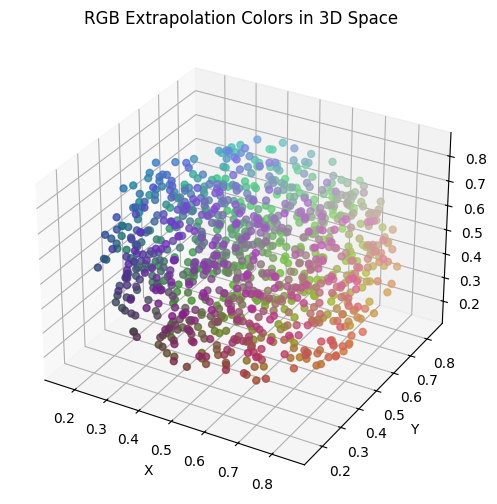

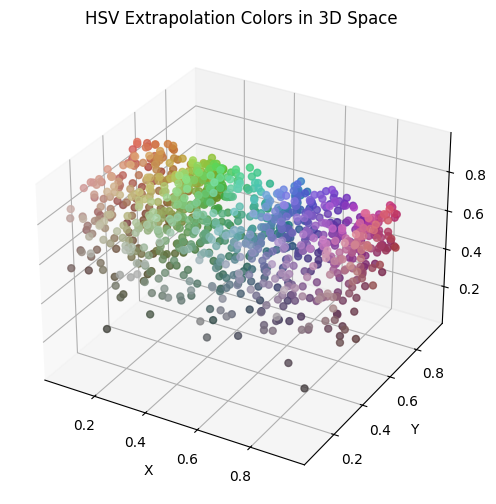

Epoch [20/100], Loss: 0.007151
Epoch [40/100], Loss: 0.004727
Epoch [60/100], Loss: 0.003746
Epoch [80/100], Loss: 0.002821
Epoch [100/100], Loss: 0.002351
Training completed!


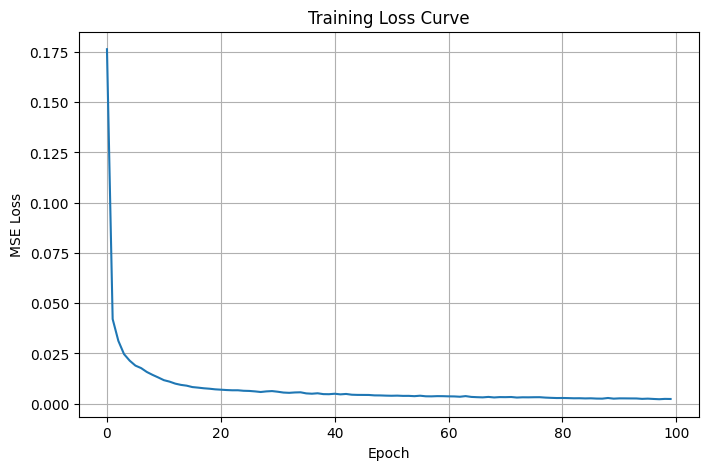

In [71]:
extra_rgb = generate_rgb_samples(1000,radius=0.4, invert_mask=False)
extra_hsv = rgb_to_hsv(extra_rgb)

# Plot the colors in 3D space
plot_colors_3d(extra_rgb, extra_rgb, title="RGB Extrapolation Colors in 3D Space")
plot_colors_3d(extra_hsv, extra_rgb, title="HSV Extrapolation Colors in 3D Space")

# Initialize model
extra_model = RGBtoHSVNet()
criterion = nn.MSELoss()
optimizer = optim.Adam(extra_model.parameters(), lr=0.001)

# print("Model architecture:")
# print(model)

training_losses, trained_model = train_model(extra_model, extra_rgb, extra_hsv, num_epochs=100, verbose=True)

# Plot training curve
plt.figure(figsize=(8, 5))
plt.plot(training_losses)
plt.title('Training Loss Curve')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.grid(True)
plt.show()

# Example usage with custom colors
custom_colors = generate_rgb_samples(100,radius=0.8, invert_mask=True)

# Calculate different types of errors
extra_mse_errors, _, _ = calculate_prediction_errors(extra_model, custom_colors, 'mse')
extra_mae_errors, _, _ = calculate_prediction_errors(extra_model, custom_colors, 'mae')
extra_channel_errors, _, _ = calculate_prediction_errors(extra_model, custom_colors, 'per_channel')

## Interpolation example

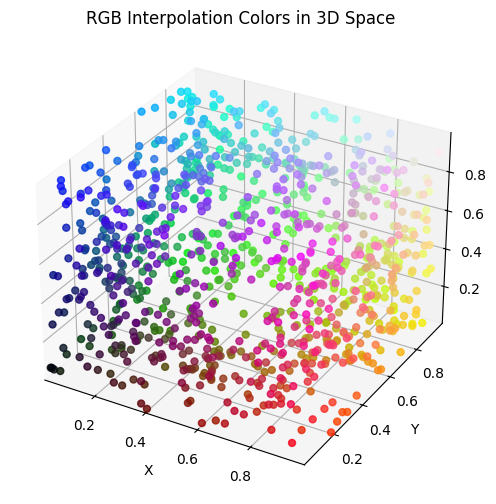

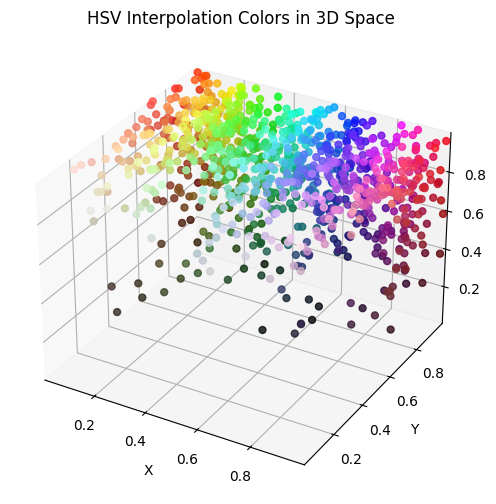

Epoch [20/100], Loss: 0.005993
Epoch [40/100], Loss: 0.003768
Epoch [60/100], Loss: 0.002644
Epoch [80/100], Loss: 0.002050
Epoch [100/100], Loss: 0.001630
Training completed!


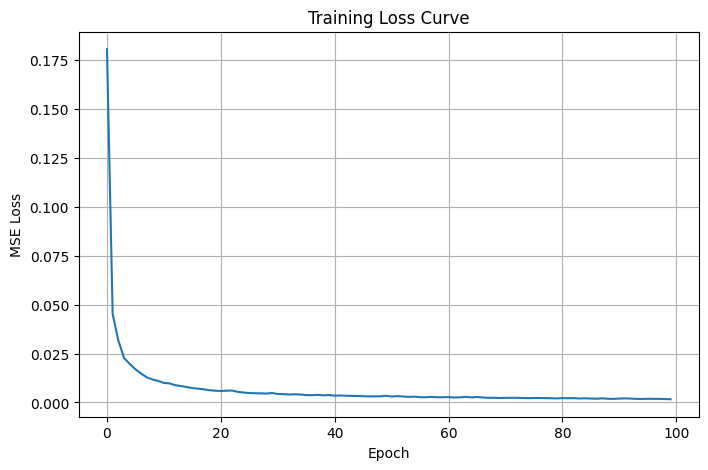

In [72]:
inter_rgb = generate_rgb_samples(1000,radius=0.4, invert_mask=True)
inter_hsv = rgb_to_hsv(inter_rgb)

# Plot the colors in 3D space
plot_colors_3d(inter_rgb, inter_rgb, title="RGB Interpolation Colors in 3D Space")
plot_colors_3d(inter_hsv, inter_rgb, title="HSV Interpolation Colors in 3D Space")

# Initialize model
inter_model = RGBtoHSVNet()
criterion = nn.MSELoss()
optimizer = optim.Adam(inter_model.parameters(), lr=0.001)

# print("Model architecture:")
# print(model)

training_losses, trained_model = train_model(inter_model, inter_rgb, inter_hsv, num_epochs=100, verbose=True)

# Plot training curve
plt.figure(figsize=(8, 5))
plt.plot(training_losses)
plt.title('Training Loss Curve')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.grid(True)
plt.show()

# Example usage with custom colors
custom_colors = generate_rgb_samples(100,radius=0.1, invert_mask=False)

# Calculate different types of errors
inter_mse_errors, _, _ = calculate_prediction_errors(inter_model, custom_colors, 'mse')
inter_mae_errors, _, _ = calculate_prediction_errors(inter_model, custom_colors, 'mae')
inter_channel_errors, _, _ = calculate_prediction_errors(inter_model, custom_colors, 'per_channel')

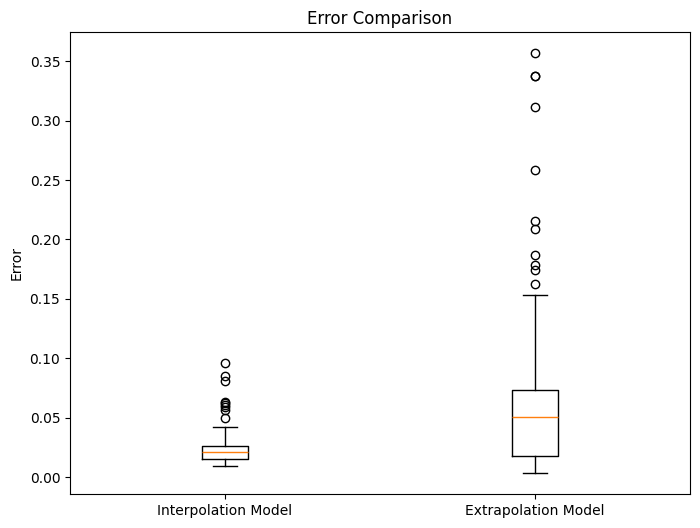

In [73]:
overall_mse_errors = np.column_stack([inter_mse_errors, extra_mse_errors])
plot_boxplots(overall_mse_errors, ['Interpolation Model', 'Extrapolation Model'])

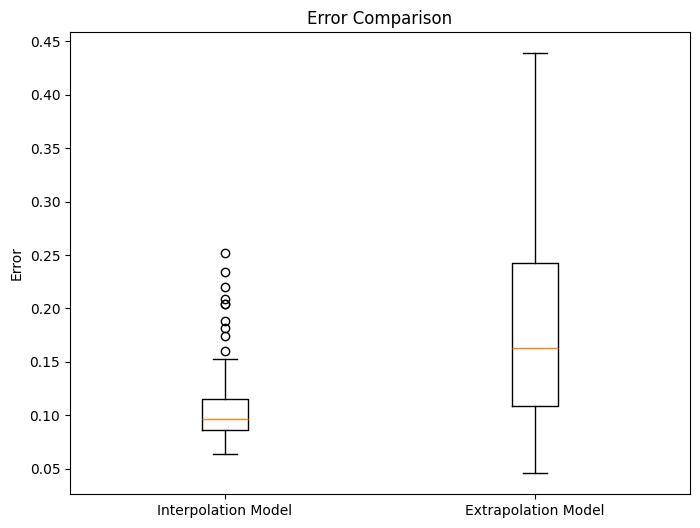

In [74]:
overall_mae_errors = np.column_stack([inter_mae_errors, extra_mae_errors])
plot_boxplots(overall_mae_errors, ['Interpolation Model', 'Extrapolation Model'])

## Random model

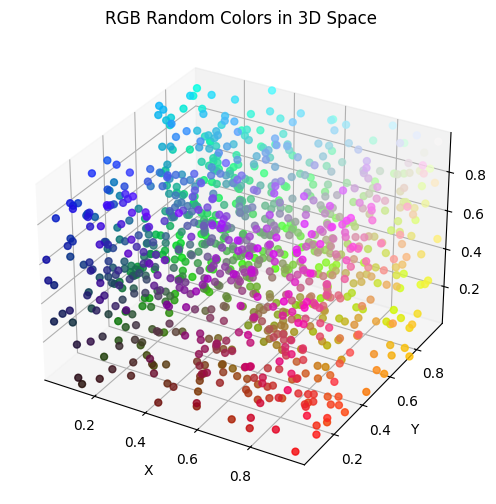

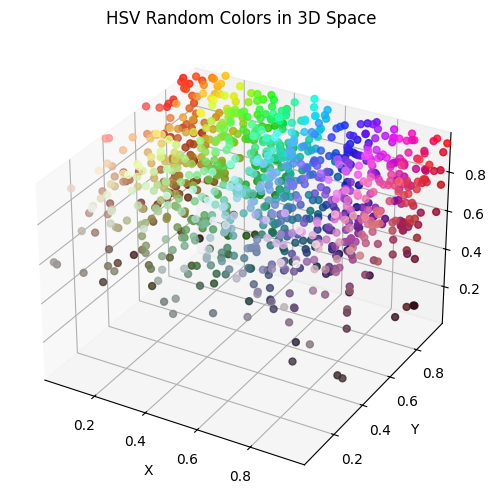

Epoch [20/100], Loss: 0.007727
Epoch [40/100], Loss: 0.004997
Epoch [60/100], Loss: 0.004099
Epoch [80/100], Loss: 0.003290
Epoch [100/100], Loss: 0.002660
Training completed!


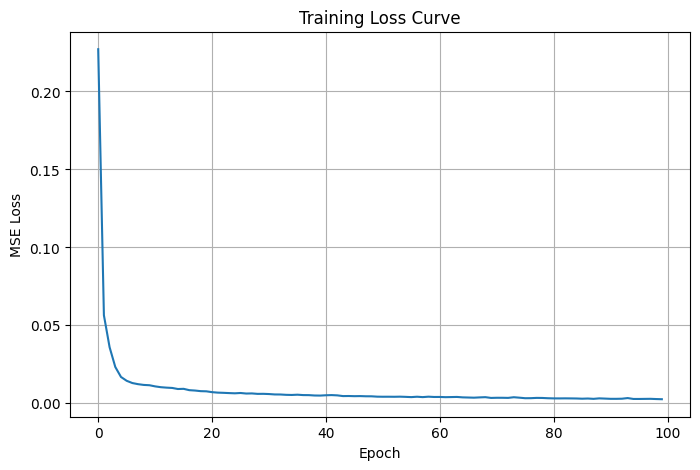

In [75]:
random_rgb = generate_rgb_samples(1000)
random_hsv = rgb_to_hsv(random_rgb)

# Plot the colors in 3D space
plot_colors_3d(random_rgb, random_rgb, title="RGB Random Colors in 3D Space")
plot_colors_3d(random_hsv, random_rgb, title="HSV Random Colors in 3D Space")

# Initialize model
random_model = RGBtoHSVNet()
criterion = nn.MSELoss()
optimizer = optim.Adam(random_model.parameters(), lr=0.001)

# print("Model architecture:")
# print(model)

training_losses, trained_model = train_model(random_model, random_rgb, random_hsv, num_epochs=100, verbose=True)

# Plot training curve
plt.figure(figsize=(8, 5))
plt.plot(training_losses)
plt.title('Training Loss Curve')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.grid(True)
plt.show()

# Example usage with custom colors
custom_colors = generate_rgb_samples(100)

# Calculate different types of errors
random_mse_errors, _, _ = calculate_prediction_errors(random_model, custom_colors, 'mse')
random_mae_errors, _, _ = calculate_prediction_errors(random_model, custom_colors, 'mae')
random_channel_errors, _, _ = calculate_prediction_errors(random_model, custom_colors, 'per_channel')

Red RGB: [1 0 0]
True Red HSV: [0. 1. 1.]
Predicted HSV for Red RGB: [-0.02195206  1.3054816   0.9508312 ]


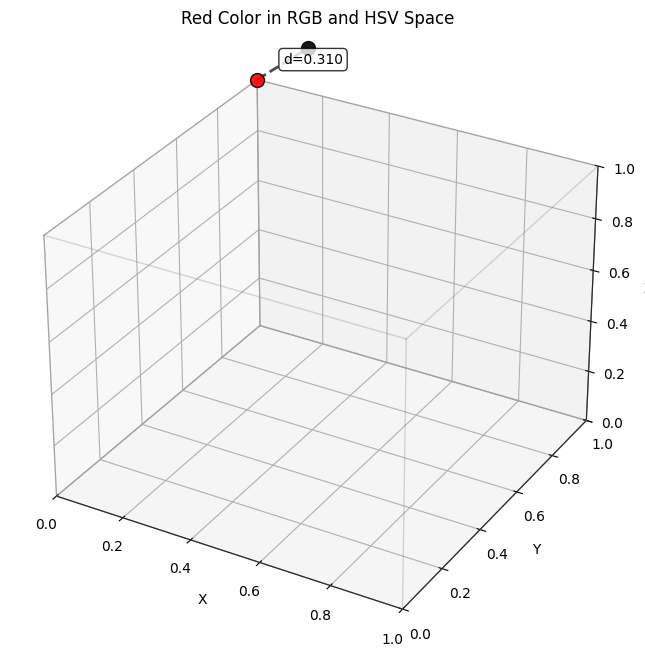

In [87]:
rgb_red = np.array([1, 0, 0])  # Red in RGB
hsv_red = rgb_to_hsv(rgb_red)  # Red in HSV
hsv_red_predict = predict_hsv(extra_model, rgb_red)

print("Red RGB:", rgb_red)
print("True Red HSV:", hsv_red)
print("Predicted HSV for Red RGB:", hsv_red_predict[0])

plot_two_points_3d(hsv_red, hsv_red_predict[0], rgb_red, [0,0,0], title="Red Color in RGB and HSV Space")

Middle RGB: [0.5 0.5 0.5]
True Middle HSV: [0.  0.  0.5]
Predicted HSV for Middle RGB: [0.49656194 0.3488252  0.52423507]


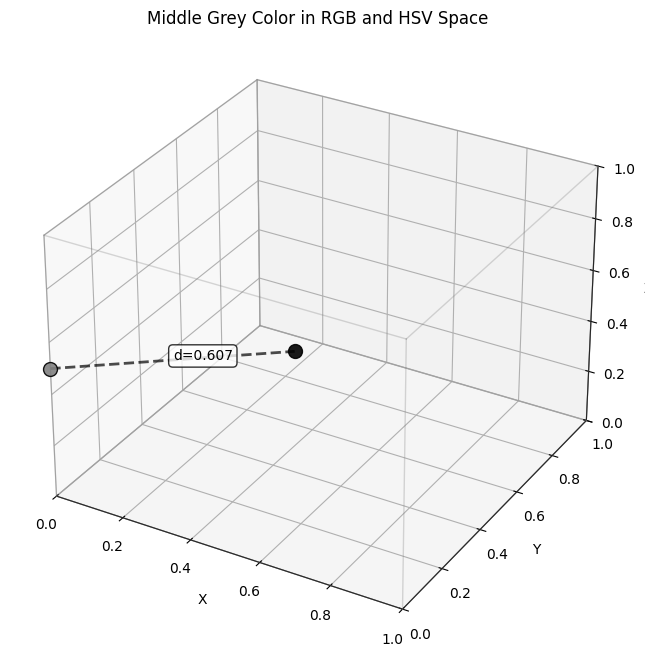

In [77]:
rgb_middle = np.array([0.5, 0.5, 0.5])  # Red in RGB
hsv_middle = rgb_to_hsv(rgb_middle)
hsv_middle_predict = predict_hsv(inter_model, rgb_middle)

print("Middle RGB:", rgb_middle)
print("True Middle HSV:", hsv_middle)
print("Predicted HSV for Middle RGB:", hsv_middle_predict[0])

plot_two_points_3d(hsv_middle, hsv_middle_predict[0], rgb_middle, [0,0,0], title="Middle Grey Color in RGB and HSV Space")

Red RGB: [1 0 0]
True Red HSV: [0. 1. 1.]
Predicted HSV for Red RGB: [0.5747181 1.1383772 1.0042791]


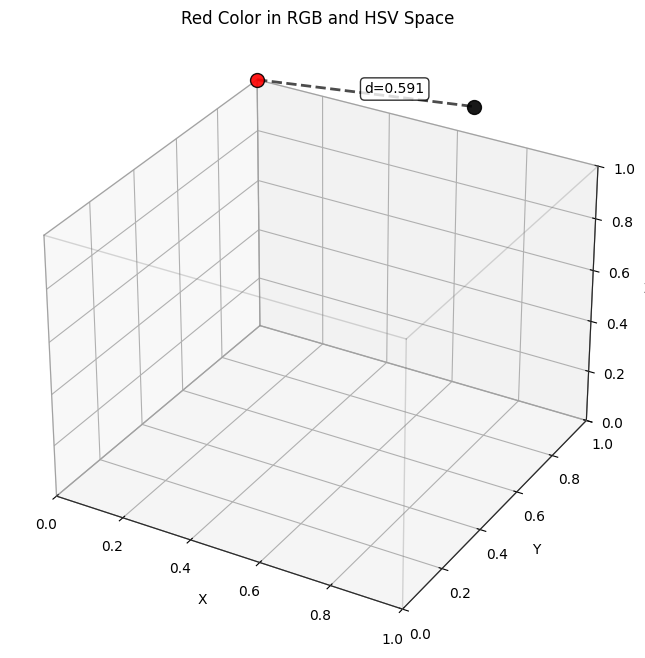


Middle RGB: [0.5 0.5 0.5]
True Middle HSV: [0.  0.  0.5]
Predicted HSV for Middle RGB: [0.51176786 0.10421218 0.5249448 ]


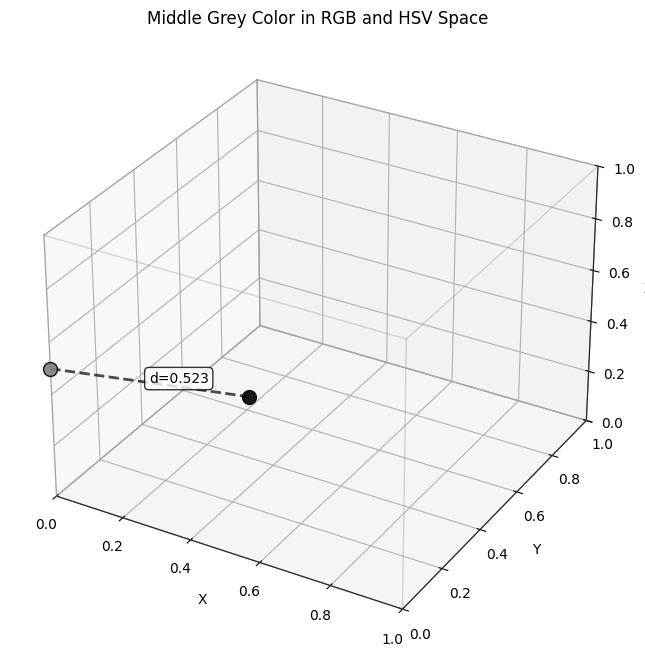

In [92]:
hsv_red_predict = predict_hsv(random_model, rgb_red)

print("Red RGB:", rgb_red)
print("True Red HSV:", hsv_red)
print("Predicted HSV for Red RGB:", hsv_red_predict[0])

plot_two_points_3d(hsv_red, hsv_red_predict[0], rgb_red, [0,0,0], title="Red Color in RGB and HSV Space")

rgb_random = np.array([0.5, 0.5, 0.5])
hsv_random = rgb_to_hsv(rgb_random)
hsv_middle_predict = predict_hsv(random_model, rgb_random)

print("\nMiddle RGB:", rgb_random)
print("True Middle HSV:", hsv_random)
print("Predicted HSV for Middle RGB:", hsv_middle_predict[0])

plot_two_points_3d(hsv_random, hsv_middle_predict[0], rgb_random, [0,0,0], title="Middle Grey Color in RGB and HSV Space")